311
Found 325 files belonging to 2 classes.
Using 260 files for training.
Found 325 files belonging to 2 classes.
Using 65 files for validation.
['distorted', 'original']


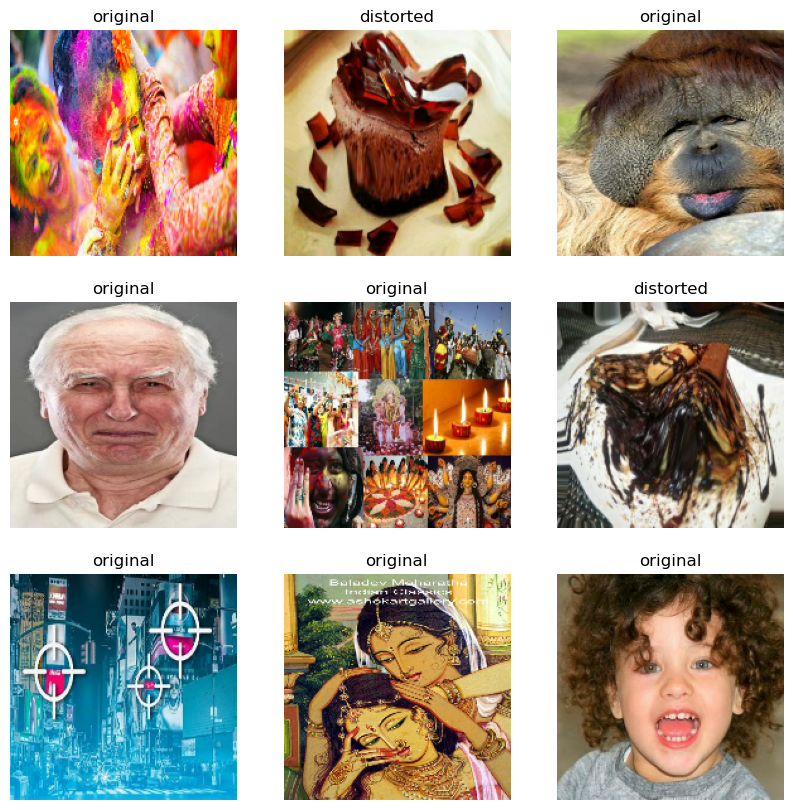

(32, 180, 180, 3)
(32,)
0.0 1.0
Epoch 1/3
9/9 [==============================] - 3s 238ms/step - loss: 0.7925 - accuracy: 0.5538 - val_loss: 0.6894 - val_accuracy: 0.4923
Epoch 2/3
9/9 [==============================] - 2s 223ms/step - loss: 0.6812 - accuracy: 0.5654 - val_loss: 0.6904 - val_accuracy: 0.4923
Epoch 3/3
9/9 [==============================] - 2s 221ms/step - loss: 0.6650 - accuracy: 0.5654 - val_loss: 0.6789 - val_accuracy: 0.4923


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
training_dir = pathlib.Path("/Users/xuhuan/Desktop/training/")
# distorted_test_dir = pathlib.Path("DisCaptcha_v0/_test")

# categories = ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]
# airplanes = list(archive_test_dir.glob('airplane/*'))
classes = ["distorted", "original"]
original = []
distorted = []

image_count = len(list(training_dir.glob('*/*.jpg')))
print(image_count)

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)